# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


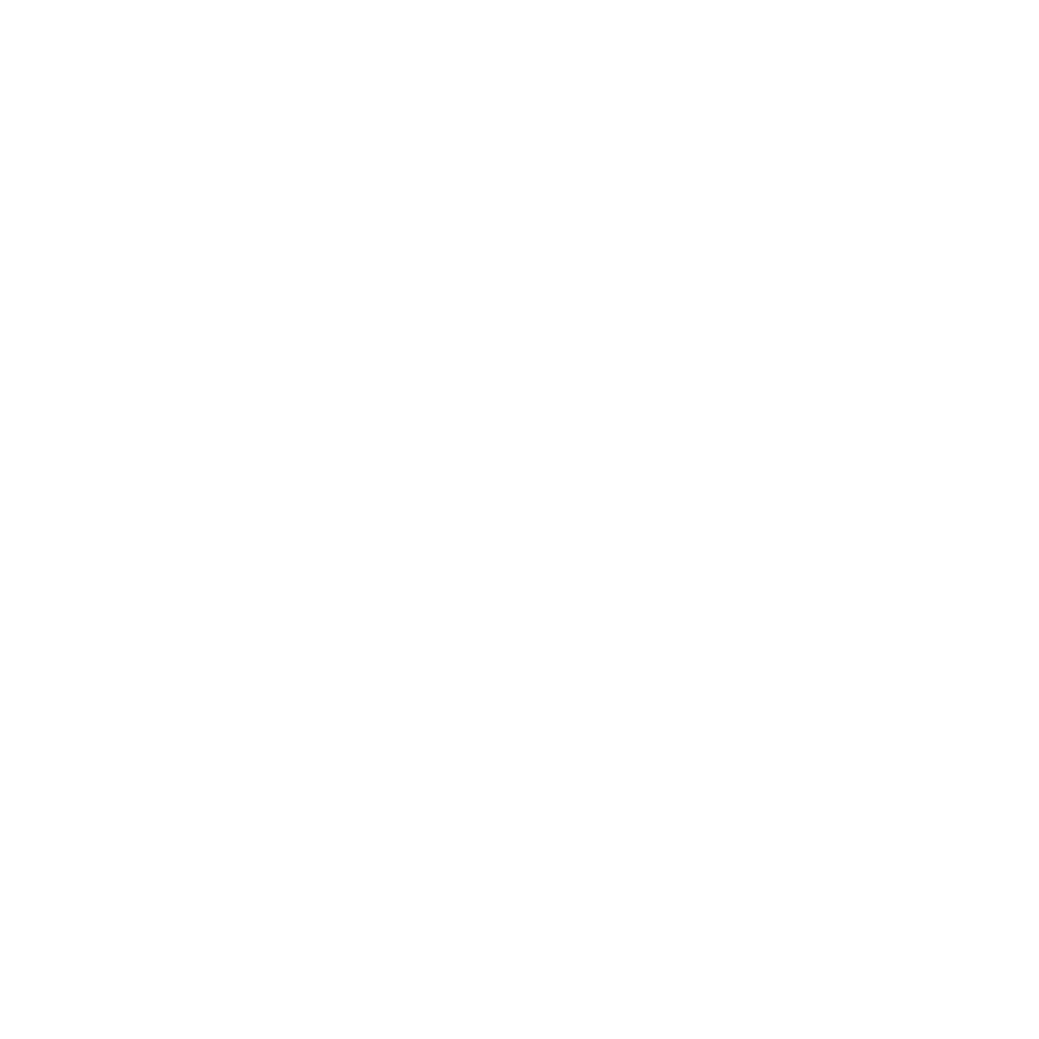

In [95]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

## Prepare Data

In [96]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [97]:
df = df.sort_values(by =['ID', 'Date'])
df.head()

,ID,Date,Element,Data_Value
55067,USC00200032,2005-01-01,TMIN,-28
55102,USC00200032,2005-01-01,TMAX,67
112671,USC00200032,2005-01-02,TMAX,122
112708,USC00200032,2005-01-02,TMIN,-6
104159,USC00200032,2005-01-03,TMIN,11


In [98]:
len(df['Date'].unique())

4017

In [99]:

##group temperatures by Date and add Year, Monthy, and Day columns to dataframe
def group_stations(df, aggfunc):
    dff=df.groupby(['Date'], as_index=False).agg({'Data_Value':aggfunc})
    temp = pd.DatetimeIndex(dff['Date'])
    dff['Year'], dff['Month'], dff['Day']=temp.year, temp.month, temp.day
    dp=dff[(dff['Month']==2) & (dff['Day']==29)] 
    return dff.drop(dp.index).drop('Date', axis=1)

def group_years_months(df, aggfunc):
    return df.groupby(['Month', 'Day'], as_index=False).agg({'Data_Value':aggfunc})

#label max and min columns
def maxmin(dfLeft, dfRight, strLabelMax, strLabelMin):
    dff=pd.merge(dfLeft, dfRight, how='inner', on=['Month', 'Day'])
    dff.rename(index=str, columns={'Data_Value_x':strLabelMax, 'Data_Value_y':strLabelMin}, inplace=True)
    dff.set_index(['Month', 'Day'], inplace=True)
    return dff

In [100]:
def prepare():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv') 
    #create 2 dataframes for Max and Min
    dfmax=df[df['Element']=='TMAX'] 
    dfmin=df[df['Element']=='TMIN']
    #find min-max values per day by all stations
    dfmax=group_stations(dfmax, 'max') 
    dfmin=group_stations(dfmin, 'min')
    #drop 2015 year
    df2015max=dfmax[dfmax['Year']==2015].drop('Year', axis=1) 
    df2015min=dfmin[dfmin['Year']==2015].drop('Year', axis=1)
    dfmax=dfmax.drop(df2015max.index) 
    dfmin=dfmin.drop(df2015min.index)
    #find min-max values per day by each year
    dfmax=group_years_months(dfmax, 'max') 
    dfmin=group_years_months(dfmin, 'min')
    # create 2 dataframes, one for years 2004-2014 and one for 2015
    dfLinesRet=maxmin(dfmax, dfmin, 'Max temp, C', 'Min temp, C')
    dfScatRet=maxmin(df2015max, df2015min, 'Max temp 2015, C', 'Min temp 2015, C')
    return (dfLinesRet, dfScatRet)

In [101]:
dfLines, dfScat=prepare()

In [102]:
dfLines

Max temp, C  Min temp, C
Month Day                          
1     1            156         -160
      2            139         -267
      3            133         -267
      4            106         -261
      5            128         -150
      6            189         -266
      7            217         -306
      8            194         -294
      9            178         -278
      10           100         -256
      11           156         -183
      12           161         -193
      13           167         -250
      14           150         -266
      15            67         -272
      16            94         -294
      17           133         -294
      18           122         -289
      19           106         -300
      20           133         -239
      21           133         -260
      22           117         -277
      23           128         -250
      24           117         -267
      25           100         -243
      26            89         -238
      27            78         -239
      28           122         -294
      29           178         -278
      30           183         -233
...                ...          ...
12    2            156         -133
      3            183         -100
      4            183         -122
      5            172         -155
      6            128         -183
      7             83         -194
      8             72         -200
      9             83         -189
      10           111         -172
      11           128         -167
      12           133         -210
      13           111         -178
      14           139         -161
      15           150         -166
      16           139         -228
      17           144         -222
      18           156         -194
      19           122         -161
      20           133         -167
      21           156         -194
      22           133         -200
      23           133         -200
      24           139         -167
      25           100         -167
      26           106         -156
      27           189         -138
      28           194         -166
      29           128         -150
      30           117         -144
      31           139         -150

[365 rows x 2 columns]

## Plotting Data

In [103]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from calendar import month_abbr
from datetime import date, timedelta

In [104]:
L = list(pd.date_range('1-1-2015', periods=365, freq='D'))
diap_date = [dt.strftime('%b %d') for dt in L]
diap_date[0:10]

['Jan 01',
 'Jan 02',
 'Jan 03',
 'Jan 04',
 'Jan 05',
 'Jan 06',
 'Jan 07',
 'Jan 08',
 'Jan 09',
 'Jan 10']

In [105]:
dfLines.index.values

array([(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8),
       (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15),
       (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22),
       (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29),
       (1, 30), (1, 31), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6),
       (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14),
       (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21),
       (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28),
       (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8),
       (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15),
       (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22),
       (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29),
       (3, 30), (3, 31), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6),
       (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14),
  

In [106]:
dfx=dfLines.reset_index()
x_val=dfx.index.values
x_ticks=dfx[dfx['Day']==1].index.tolist()
print(x_val,'\n\n', x_ticks)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [107]:
2014 - len(x_ticks)

2002

In [108]:
dfx.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<IPython.core.display.Javascript object>


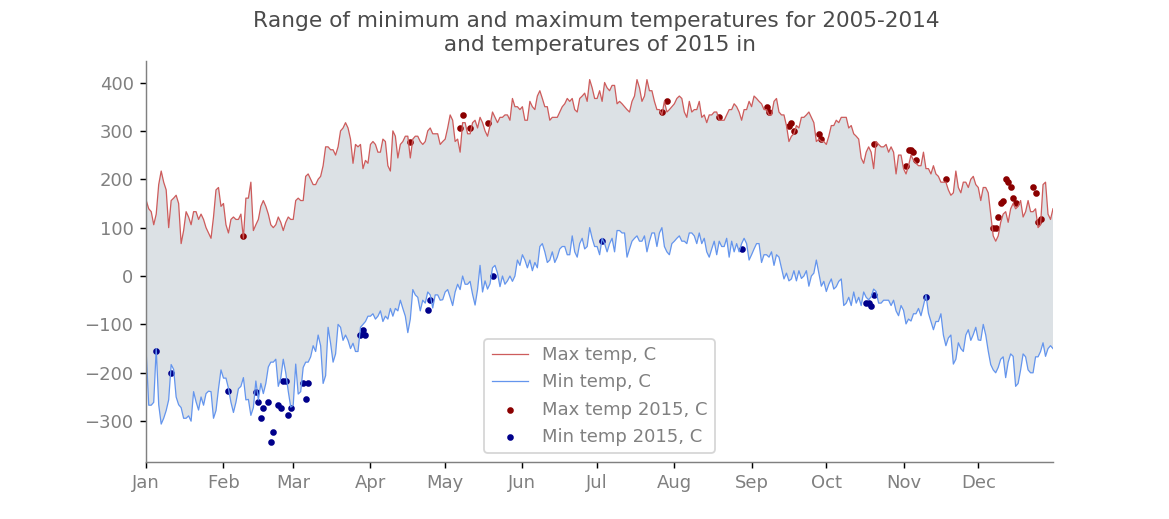

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:21: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [109]:
def plot2lines(dtf):
    #ax1=dfLines.xs(1).plot.line(figsize=(9, 5), use_index=False) # for one month

    dfx=dtf.reset_index()
    x_val=dfx.index.values
    x_ticks=dfx[dfx['Day']==1].index.tolist()

    ax1=dtf.plot.line(x_val, figsize=(9, 4), xticks=x_ticks) # plot 2 lines
    ax1.fill_between(x_val, dtf['Max temp, C'], dtf['Min temp, C'], 
                     facecolor='lightslategrey',
                     alpha=0.25) # fill betwee 2 lines
    return ax1

def format_plot_area(ax1):
    # format plot area
    ax1.spines['bottom'].set_color('grey')
    ax1.spines['left'].set_color('grey')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_axis_bgcolor('white')

    h, l = ax1.get_legend_handles_labels()
    lines=(h[0], h[1]) #ax1.get_lines()
    h[0].set_color('indianred')
    h[1].set_color('cornflowerblue')
    ax1.legend(h, ('Max 2005-2014', 'Min 2005-2014', 
                   '2015 above Max', '2015 below Min'), loc=0, frameon=False)
    plt.setp(lines, linewidth=0.7)
    ax1.set_xticklabels([s for s in month_abbr if s!='']) # set x-labels
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_title('Range of minimum and maximum temperatures for 2005-2014 \n and temperatures of 2015 in ', alpha=0.7)
    #ax1.set_ylabel('Temperature, C')
    ##mine
    ax1.tick_params(labelcolor='grey')
    #for text in ax1.legend().get_texts():
    #    text.set_color("grey")
    for text in ax1.legend().get_texts():
        text.set_color("grey")
    
def plot_scatter(ax1):
    df=pd.merge(dfLines.reset_index(), dfScat.reset_index(), how='inner')
    df['ind']=df.index
    dfMx=df[df['Max temp 2015, C'] > df['Max temp, C']]
    dfMn=df[df['Min temp 2015, C'] < df['Min temp, C']]

    dfMx.plot.scatter(x='ind', y='Max temp 2015, C', label='Max temp 2015, C', ax=ax1, 
                      color='darkred', s=7)
    dfMn.plot.scatter(x='ind', y='Min temp 2015, C', label='Min temp 2015, C', ax=ax1, 
                      color='darkblue', s=7)
    return ax1

ax1=plot2lines(dfLines)
plot_scatter(ax1)
format_plot_area(ax1)

In [110]:
plt.savefig('vis.png')